In [2]:
import sys
sys.path.append("../")
sys.path.append("../deepYeast/")
sys.path.append("../deepYeast/deeplab/")
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from cellmating.mating import Mating
from cellmating.utils import file_traverse, dump_to_pkl
from cellmating.io import imread, imsave
from cellmating.mating import Mating
from script_wlli.for_check_result_utils import draw_subgraph

In [7]:
# from cellmating.tracking._ioutrack import Tracker
from cellmating.tracking._sort import Tracker
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
root = "/media/wlli/T7/data/mating_all/"
file_list = file_traverse(root, file_regular=r".*/selected/.*.tif")
print("totle images: ", len(file_list))

totle images:  190


In [9]:
file_name = file_list[152]
image = imread(file_name)
file_name

'/media/wlli/T7/data/mating_all/20220903_YAV2104xYAV2105_003/selected/YAV2104xYAV2105_005_19_rigid_004008.tif'

In [11]:
%%time
trace = Tracker(image[:, -2,])
_ = trace()
traced_image = trace.to_image()

CPU times: user 9.58 s, sys: 265 ms, total: 9.85 s
Wall time: 9.89 s


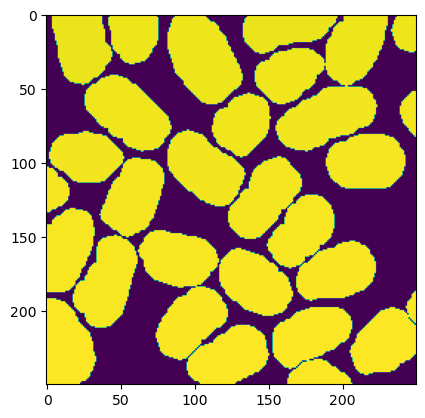

In [12]:
plt.imshow(traced_image[1])

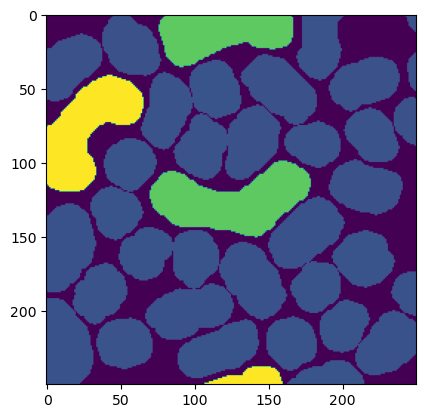

In [14]:
plt.imshow(traced_image[-1])

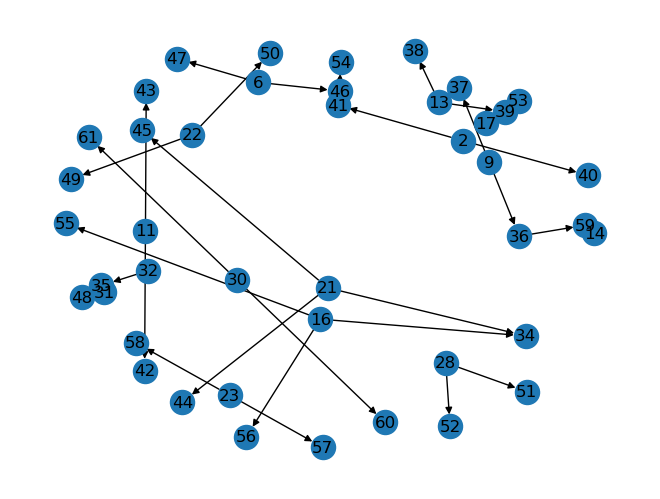

In [15]:
nx.draw(trace.network, with_labels=True)

In [16]:
tracked = np.zeros((image.shape[0], image.shape[1], image.shape[2], image.shape[3]), 
                   dtype=image.dtype)
tracked[:, 0:image.shape[1]-1] = image[:, 0:image.shape[1]-1]
tracked[:, image.shape[1]-1] = traced_image

In [17]:
key = int(file_name.split("_")[-1][:-4])
key = np.unique(tracked[-1,-1][tracked[-1,-2] == key])[0]%1000
c_mating = Mating(image=tracked, cells=trace.trackers, center=key, g=trace.network)

AttributeError: module 'networkx' has no attribute 'bfs_layout'

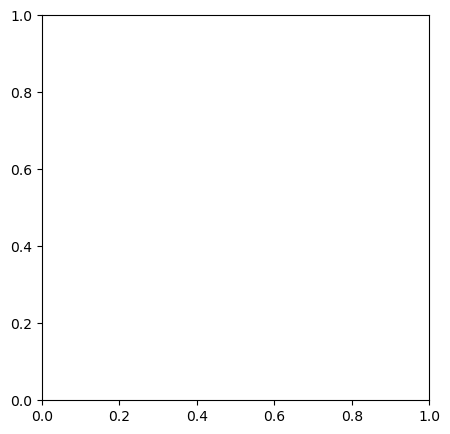

In [18]:
draw_subgraph(trace.network, key, c_mating.p, c_mating.m)
# plt.savefig("./figs_for_check_data/"+os.path.basename(file_name)[:-4]+"_net.png")

In [22]:
imsave("./test_trace_image.tif", traced_image, imagej=True)

In [9]:
imsave("./test_seg_image.tif", image[:, -2,], imagej=True)

In [68]:
tracked = np.zeros((image.shape[0], image.shape[1], image.shape[2], image.shape[3]), 
                   dtype=image.dtype)
tracked[:, 0:image.shape[1]-1] = image[:, 0:image.shape[1]-1]
tracked[:, image.shape[1]-1] = traced_image

In [47]:
save_name = file_name
imsave(save_name, tracked, imagej=True)
dump_to_pkl(trace.network, save_name[:-4]+".network")
dump_to_pkl(trace.trackers, save_name[:-4]+".tracker")

In [48]:
tracked.shape

(241, 5, 250, 250)

In [34]:
data = np.array([[0,1,2,],[3,4,5],[6,7,8]])

In [78]:
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [86]:
5 in data[:, 0:2]

False

In [80]:
data.sum(1)

array([ 3, 12, 21])